In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


from scipy.stats import zscore
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


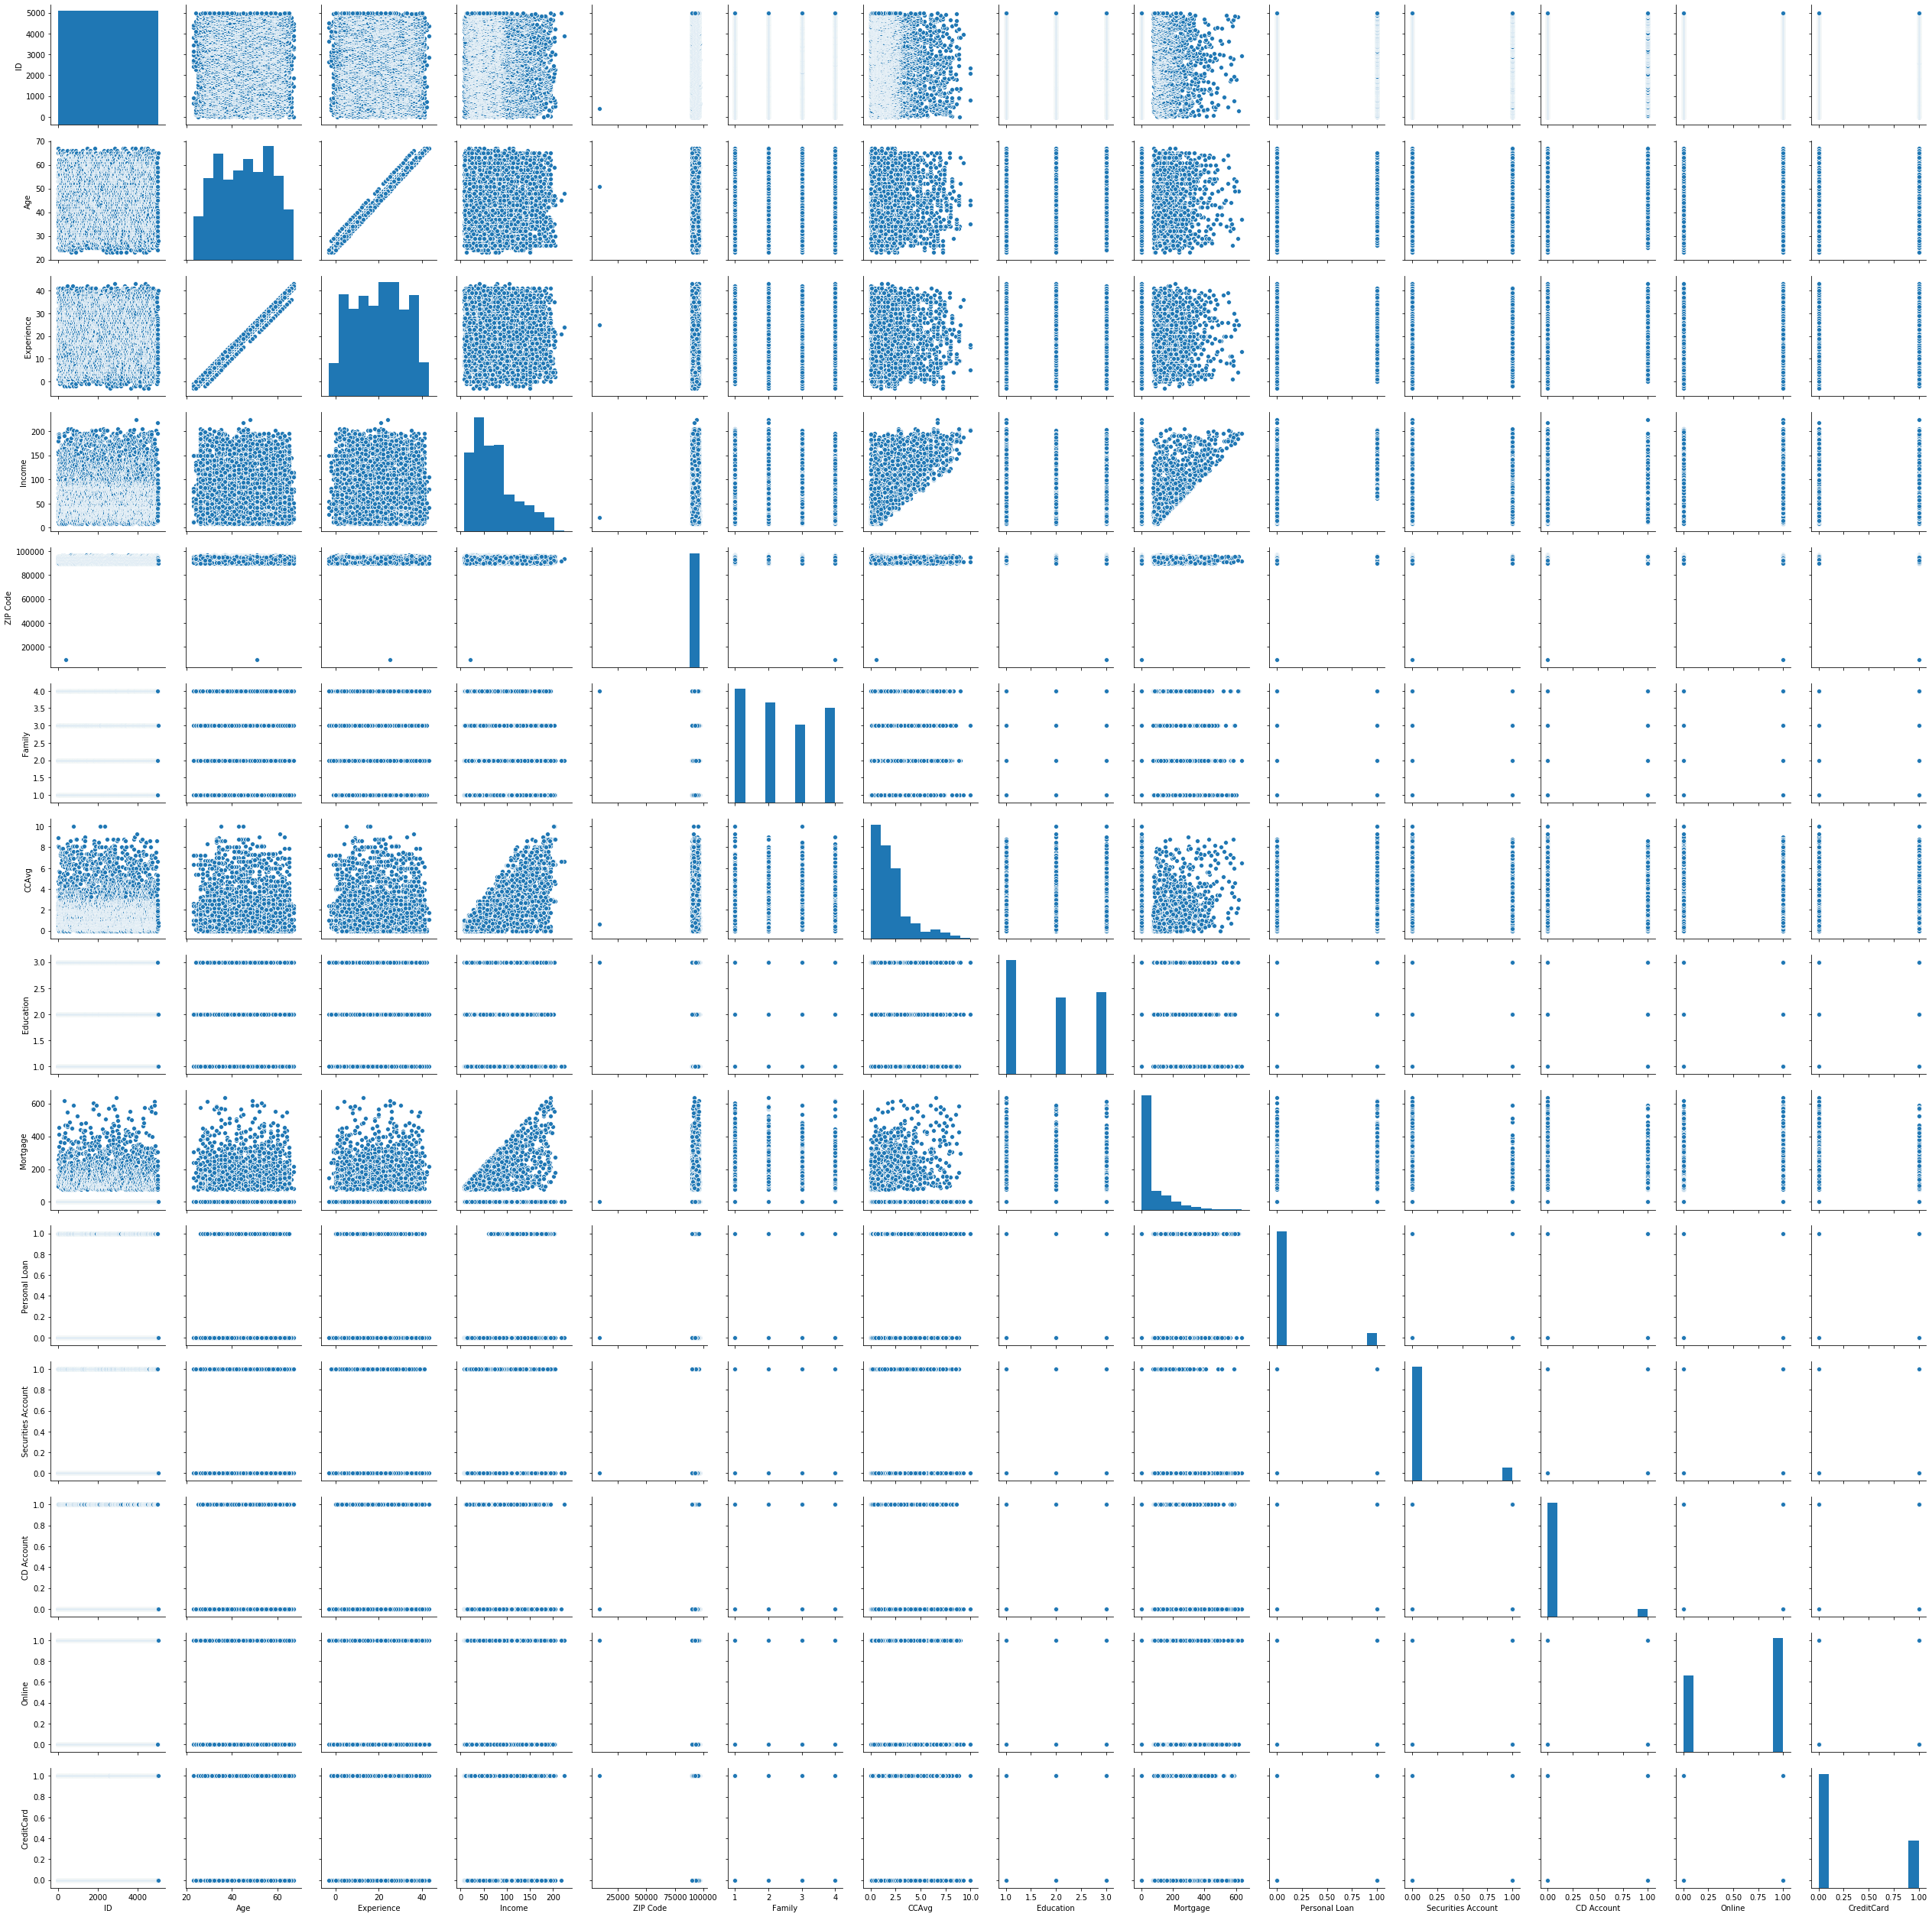

In [5]:
sns.pairplot(df)

In [6]:
#There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values.

In [7]:
df.drop(df.loc[df['Experience'] <0].index, inplace=True)

In [8]:
df.shape

(4948, 14)

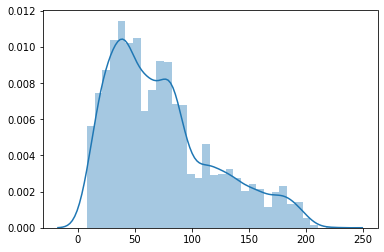

In [9]:
sns.distplot(df[['Income']])

In [10]:
#positively skewed. Majority of the customers have income somewhere between 45K and 100K.

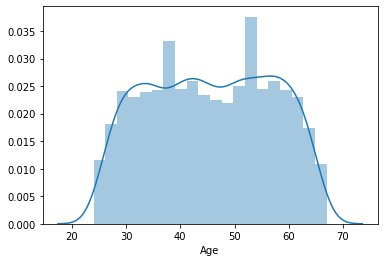

In [11]:
sns.distplot( df['Age'])

In [12]:
# Majority of customers are falling between 30 years and 60 years of age.

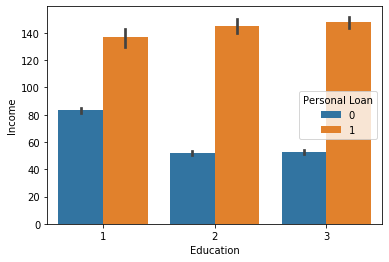

In [13]:
sns.barplot(x="Education", y="Income", hue="Personal Loan", data=df)

In [14]:
#Plot shows that people with education level 3 have higher incomes.
#customers go for personal loans regardless of the education level.

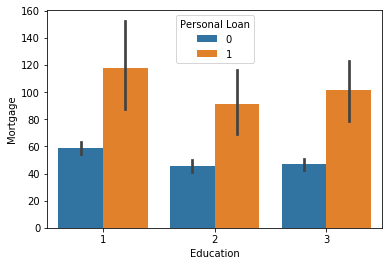

In [15]:
sns.barplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

In [16]:
#Customers who taken loan also have higher mortgages.

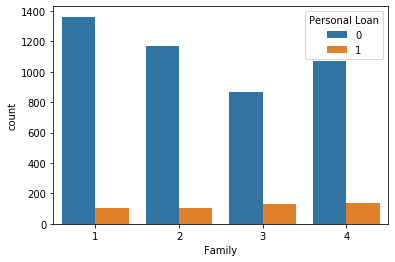

In [17]:
sns.countplot(x="Family", data=df, hue="Personal Loan")

In [18]:
#family size doent effect whether they go for personal loan or not 

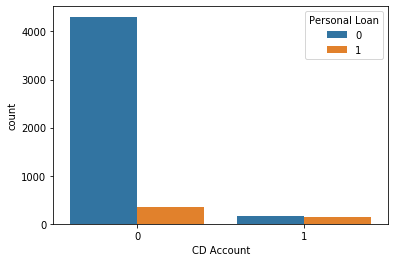

In [19]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

In [20]:
#Customers who does not have CD account does not have loan, almost all customers who has CD account has loan as well 

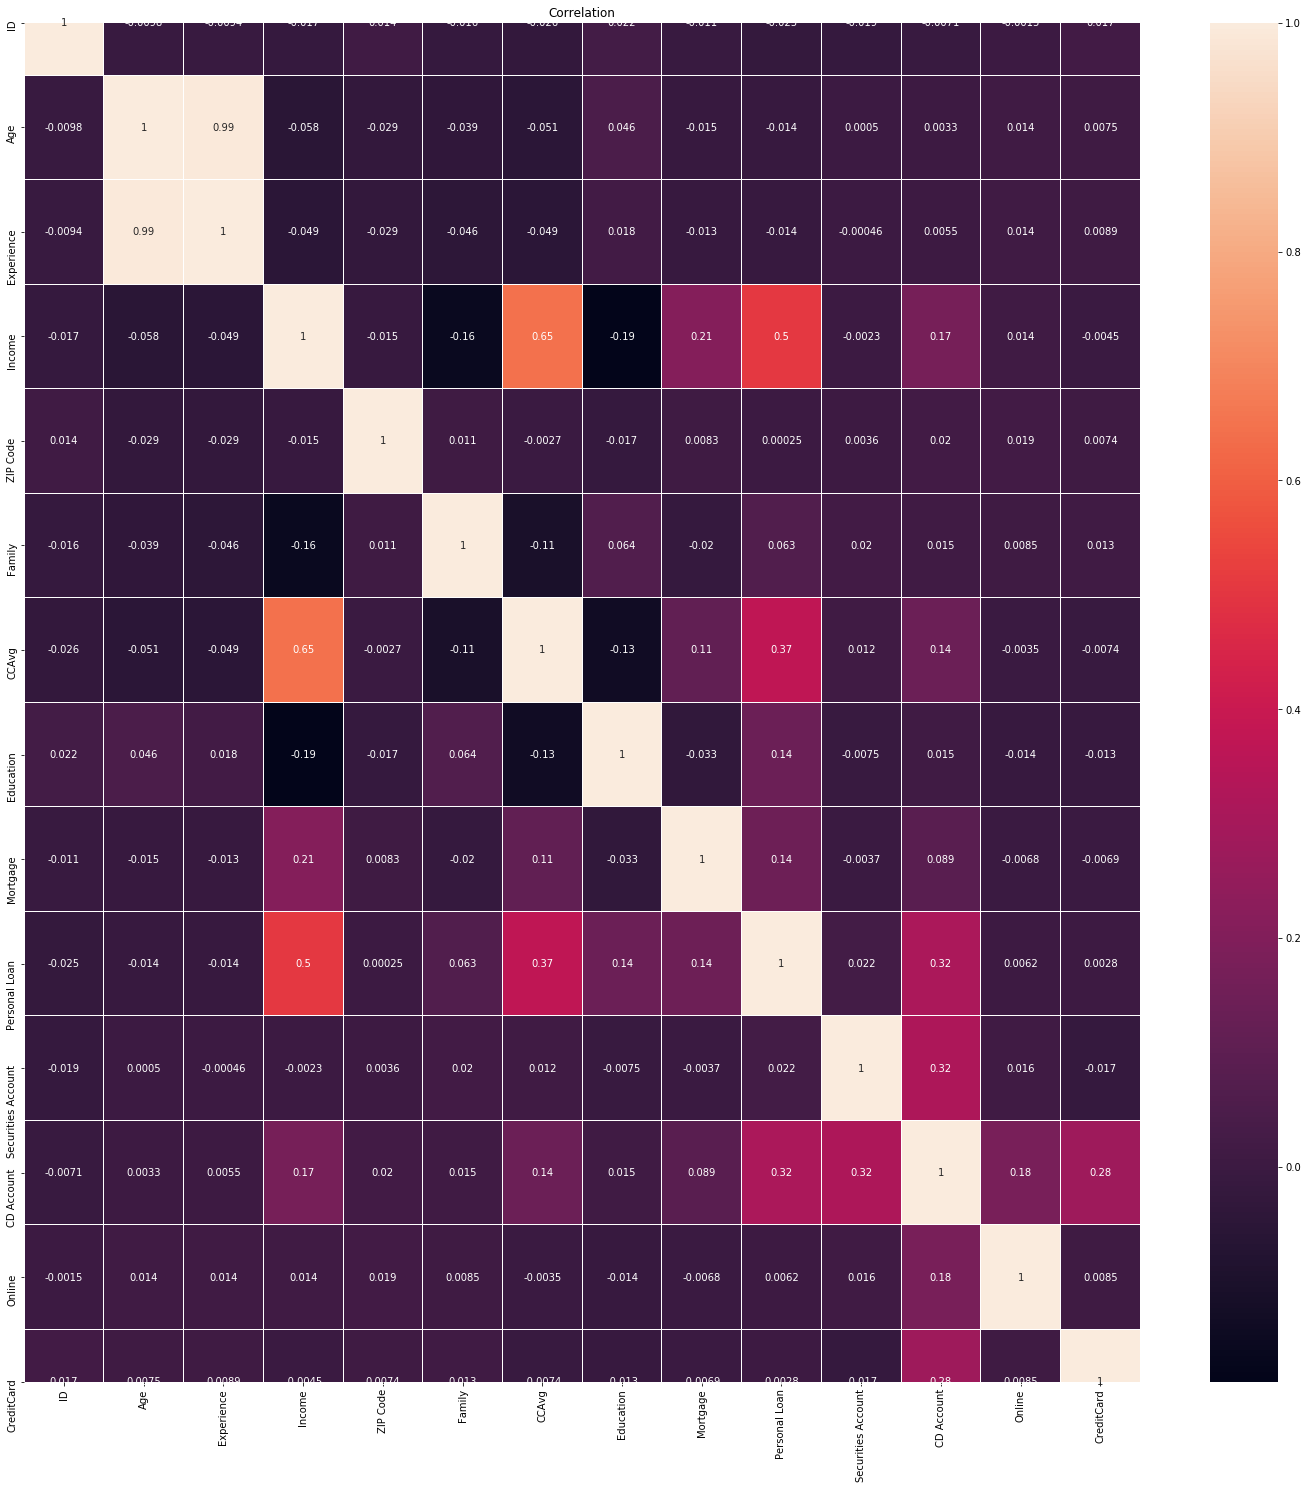

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(df.corr(), annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

In [22]:
#Age and  Experoence is highly corelated
#Income and CCAvg also corelated

In [23]:
y= df['Personal Loan']
X= df.drop(['ID','Experience'], axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

In [25]:
knn = KNeighborsClassifier()
logi = LogisticRegression()
naive = GaussianNB()

# Naive Bayes

In [26]:
naive.fit(X_train, y_train)

naive_predict = naive.predict(X_test)
print("What is the Testing Accuracy")
print(naive.score(X_test,y_test))
print("What is the Training Accuracy")
print(naive.score(X_train,y_train))

What is the Testing Accuracy
1.0
What is the Training Accuracy
1.0


In [27]:
print(metrics.classification_report(y_test, naive_predict))
print(metrics.confusion_matrix(y_test, naive_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1340
           1       1.00      1.00      1.00       145

   micro avg       1.00      1.00      1.00      1485
   macro avg       1.00      1.00      1.00      1485
weighted avg       1.00      1.00      1.00      1485

[[1340    0]
 [   0  145]]


## KNN

In [28]:
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
print("What is the Testing Accuracy")
print(knn.score(X_test,y_test))
print("What is the Training Accuracy")
print(knn.score(X_train,y_train))

What is the Testing Accuracy
0.9023569023569024
What is the Training Accuracy
0.9026855327750505


In [29]:
print(metrics.confusion_matrix(y_test, knn_predict))

[[1332    8]
 [ 137    8]]


# Logistic

In [30]:
logi.fit(X_train, y_train)
logi_predict = logi.predict(X_test)
print("What is the Testing Accuracy")
print(logi.score(X_test,y_test))
print("What is the Training Accuracy")
print(logi.score(X_train,y_train))
print(metrics.confusion_matrix(y_test, logi_predict))

What is the Testing Accuracy
0.9050505050505051
What is the Training Accuracy
0.9087496390412937
[[1298   42]
 [  99   46]]


C:\Users\vikab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Observation
Logistic regression model is best model in this case.
clearly Naive Bayes is not a good model in this case.
we get best accuracy model in the case of Logistic.
we get higher number of true positives in the case of Logistic.
Precision and recall both are higher in case of Logistic.